# 1-Imports


In [27]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
# from  import load_split_csv, image_to_array

# 2-Load Features


In [28]:
X_train = np.load("../features/efficientnet_lbp/train_features.npy")
y_train = np.load("../features/efficientnet_lbp/train_labels.npy")

X_val = np.load("../features/efficientnet_lbp/val_features.npy")
y_val = np.load("../features/efficientnet_lbp/val_labels.npy")
print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape, y_val.shape)


Train: (2620, 1290) (2620,)
Val:   (371, 1290) (371,)


# 3-Sanity check

In [29]:
print("Feature min:", X_train.min())
print("Feature max:", X_train.max())
print("Mean:", X_train.mean())
print("Std:", X_train.std())


Feature min: -0.26687484979629517
Feature max: 6.085814952850342
Mean: 0.11043523121226106
Std: 0.4096727544502905


# 4-SVM Pipeline

In [30]:
class_weights = {0:0.834, 1:0.991, 2:0.935, 3:0.935, 4:0.958, 5:1.657} 
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(
        kernel="rbf",
        C=10,
        gamma="scale",
        class_weight=class_weights,
        probability=True
    ))
])


# 5-Training SVM


In [31]:

print("Training SVM...")
svm_pipeline.fit(X_train, y_train)
print("Training done.")

Training SVM...


Training done.


# 6-Validation Evaluation

In [32]:
y_pred = svm_pipeline.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", acc)

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Validation Accuracy: 0.8814016172506739

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        77
           1       0.93      0.91      0.92        89
           2       0.96      0.94      0.95        49
           3       0.88      0.83      0.86        72
           4       0.86      0.94      0.89        63
           5       0.63      0.57      0.60        21

    accuracy                           0.88       371
   macro avg       0.85      0.85      0.85       371
weighted avg       0.88      0.88      0.88       371


Confusion Matrix:
[[69  0  0  4  4  0]
 [ 1 81  2  0  0  5]
 [ 0  2 46  0  0  1]
 [ 5  3  0 60  3  1]
 [ 3  0  0  1 59  0]
 [ 2  1  0  3  3 12]]


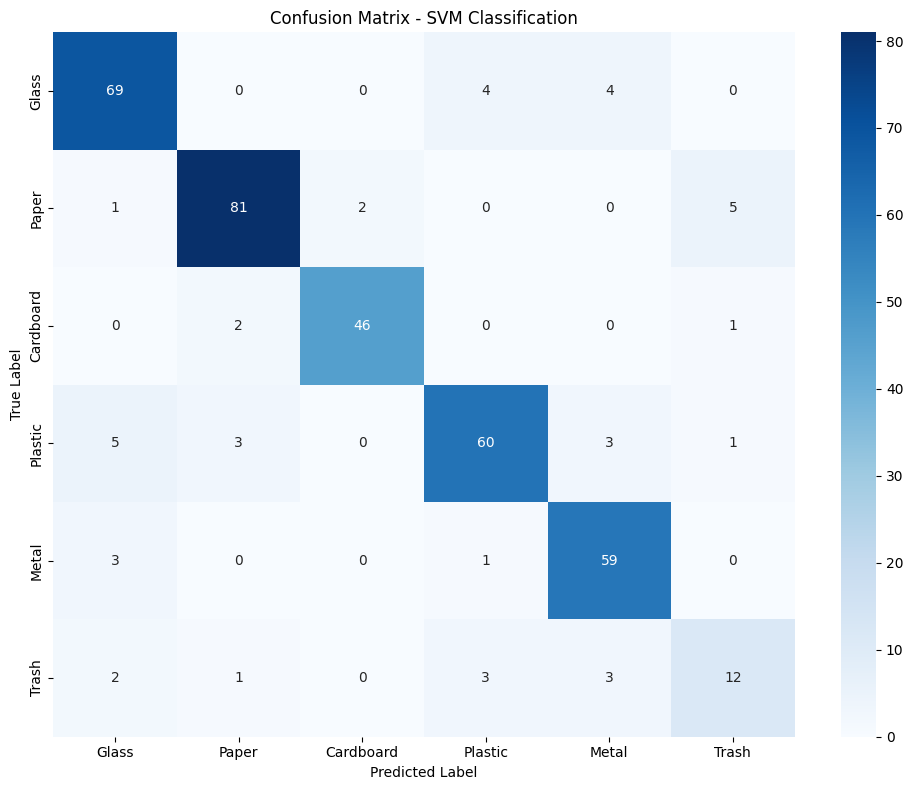

In [33]:
# 7-Confusion Matrix Visualization

# Class names for better labels
class_names = ['Glass', 'Paper', 'Cardboard', 'Plastic', 'Metal', 'Trash']

# Create confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - SVM Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [34]:
# # Also show normalized confusion matrix
# cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# plt.figure(figsize=(10, 8))
# sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
#             xticklabels=class_names, yticklabels=class_names)
# plt.title('Normalized Confusion Matrix - SVM Classification')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.tight_layout()
# plt.show()

In [35]:
# # 8-Error Analysis

# val_paths, _ = load_split_csv("../data/splits/val_paths.csv")

# misclassified = y_val != y_val_pred
# misclassified_indices = np.where(misclassified)[0]
# print(f"Number of misclassified samples: {len(misclassified_indices)}")

# # Visualize some misclassified images
# fig, axes = plt.subplots(2, 5, figsize=(15, 6))
# for i, idx in enumerate(misclassified_indices[:10]):
#     img = image_to_array(val_paths[idx])
#     ax = axes[i // 5, i % 5]
#     ax.imshow(img)
#     ax.set_title(f"True: {class_names[y_val[idx]]}\nPred: {class_names[y_val_pred[idx]]}", fontsize=8)
#     ax.axis('off')
# plt.tight_layout()
# plt.show()

In [36]:
import os

IMAGE_EXTS = {".jpg", ".jpeg", ".png", ".bmp", ".gif", ".tif", ".tiff"}

def count_images_in_root(root):
    for dirpath, dirnames, filenames in os.walk(root):
        # Skip the root itself if you only care about its immediate subdirs
        if dirpath == root:
            continue

        count = sum(
            1
            for f in filenames
            if os.path.splitext(f)[1].lower() in IMAGE_EXTS
        )
        rel_dir = os.path.relpath(dirpath, root)
        print(f"{rel_dir}: {count} images")

if __name__ == "__main__":
    base = "../data"          # adjust if needed
    augmented_root = os.path.join(base, "augmented")
    raw_root = os.path.join(base, "raw")

    print("Augmented:")
    count_images_in_root(augmented_root)
    print("\nRaw:")
    count_images_in_root(raw_root)


Augmented:
0: 192 images
1: 140 images
2: 222 images
3: 159 images
4: 198 images
5: 215 images

Raw:
cardboard: 259 images
glass: 401 images
metal: 328 images
paper: 476 images
plastic: 386 images
trash: 110 images
